* incelenen veri setindeki gözlemlerin eksik olması durumunu ifade etmektedir

* Eksik değerlere sahip gözlemlerin veri setinden direk çıkarılması ve rassallığının incelenmemesi yapılacak istatistiksel çıkarımların, modelleme çalışmalarının güvenilirliğini düşürecektir- Reha alpar

* veri setindeki eksikliğin yapısal bir eksiklik olup olmadığının bilinmesi gerekir (rastgele mi değil mi )
* Na her zaman eksiklik anlamına gelmez örn kredi kartı harcaması yapmamışsa 0 yerine na olabilir bazen
* Bilgi kaybı


### Eksik veri Türleri
* Tümüyle rassantısal kayıp : Diğer değişkenlerden ya da yapısal bir problemden kaynaklanmayantamamen rastgele oluşan gözlemler
* Rsatlantısal kayıp : Diğer değişenlere bağlı olarak oluşabilen eksiklik türü
* Rastlantısal olmayan kayıp : Göz ardı edilemeyecek olan ve yapısal problemler ile ortaya çıkan kayıp türü 

## Eksik Verinin Rassalık Testi

* Görsel Teknikler
* Bağımsız iki örneklem t testi
* Kolerasyon Testi 
* Little' nin Mcar testi   # genellikle pratikte görsel teknikler ve mcar testi kullanılır

## Eksik Veri Nasıl Giderilir ? 
* Silme yöntemleri
    * gözlem ya da değişken silme yöntemi
    * Liste bazında silme yöntemi(Listwise Method)
    * Çiftler bazında silme yöntemi(Pairwise Method)        # Değişkende %70 eksiklik varsa direk silinmesi mantıklı olur    
* Değer atama yöntemleri
    * Ortance, ortalama, medyan
    * En benzer birime atama
    * Dış kaynaklı atama
* Tahmine dayalı yöntemler
    * Makine öğrenmesi
    * EM
    * Çoklu atama yöntemleri

## Eksik Veri Hızlı Çözüm

In [16]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,17,7,np.NaN,2,31])
df = pd.DataFrame({
    "V1":V1,
    "V2":V2,
    "V3":V3
})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,17.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [4]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [5]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [6]:
df.isnull().sum().sum()

7

In [7]:
df[df.isnull().any(axis=1)]   #any en az bir tane eksik gözlem barındıran satırlar

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [8]:
df[df.notnull().all(axis=1)]   # all notnull hepsi dolu olanlar 

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,17.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [9]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]   # üsttekiyle aynı

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,17.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [10]:
# Eksik değerlerin direk silinmesi
 
df.dropna()    # 1 tane bile gözlemde eksik varsa direk siler 

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,17.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [11]:
df.dropna(inplace=True) #inplace kalıcı değişiklik

In [13]:
# Eksik değerleri doldurma


df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [14]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [15]:
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [17]:
df.apply(lambda x : x.fillna(x.mean()), axis=0)    # bütün değişkenler için doldurma yapan fonksiyon

,V1,V2,V3
0,1.0,7.000000,11.428571
1,3.0,6.166667,12.000000
2,6.0,5.000000,5.000000
3,6.0,8.000000,6.000000
4,7.0,12.000000,17.000000
5,1.0,6.166667,7.000000
6,6.0,6.166667,11.428571
7,9.0,2.000000,2.000000
8,15.0,3.000000,31.000000


# Eksik Veri Yapısının Görselleştirilmesi 
    * Rassallık incelemesi

In [19]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,17,7,np.NaN,2,31])
df = pd.DataFrame({
    "V1":V1,
    "V2":V2,
    "V3":V3
})

df.isnull().sum() # değişkenlerdeki eksik değer seyısı

V1    2
V2    3
V3    2
dtype: int64

In [20]:
df.notnull().sum() # değişkenlerdeki tam değer seyısı

V1    7
V2    6
V3    7
dtype: int64

In [21]:
df.isnull().sum().sum() #değişkenlerdeki toplam eksik değer sayısı

7

In [22]:
!pip install missingno

You should consider upgrading via the 'c:\users\alperen kavurga\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


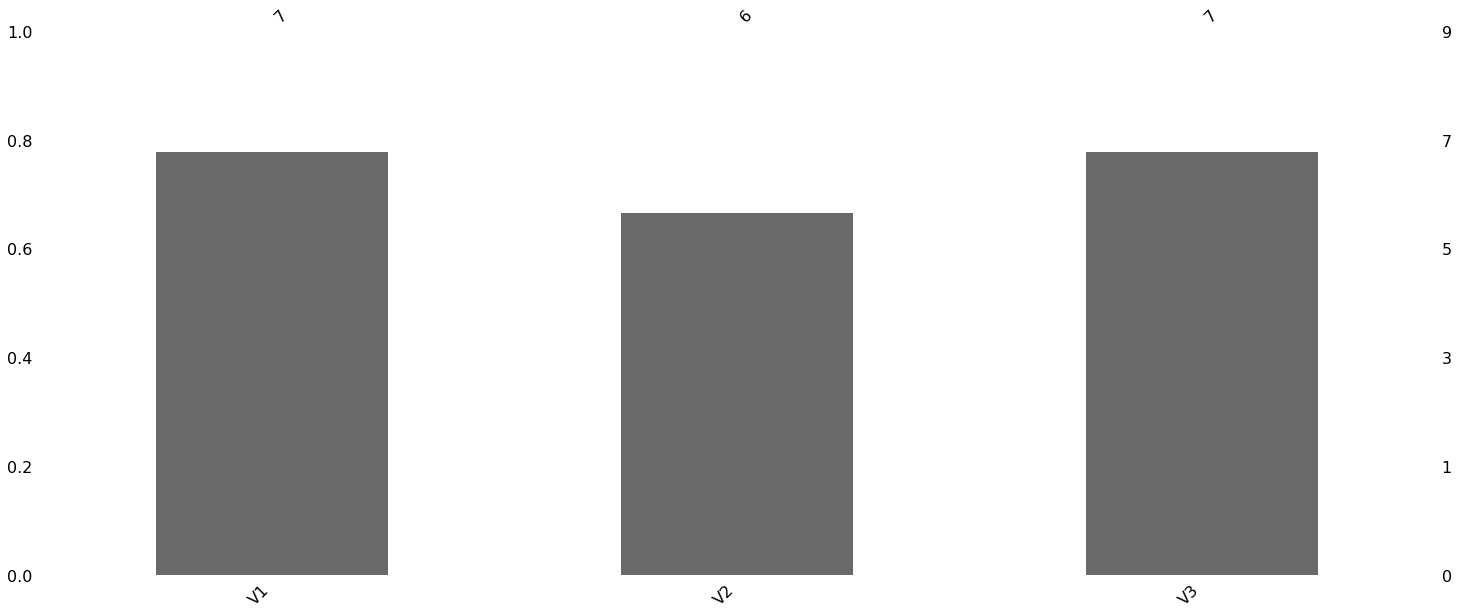

In [23]:
import missingno as msno


msno.bar(df);  #sol taraf yüzde kaç dolu oldukları ist taraf kaç tane dolu gözlem olduğu sağ taraf gözlem sayısı

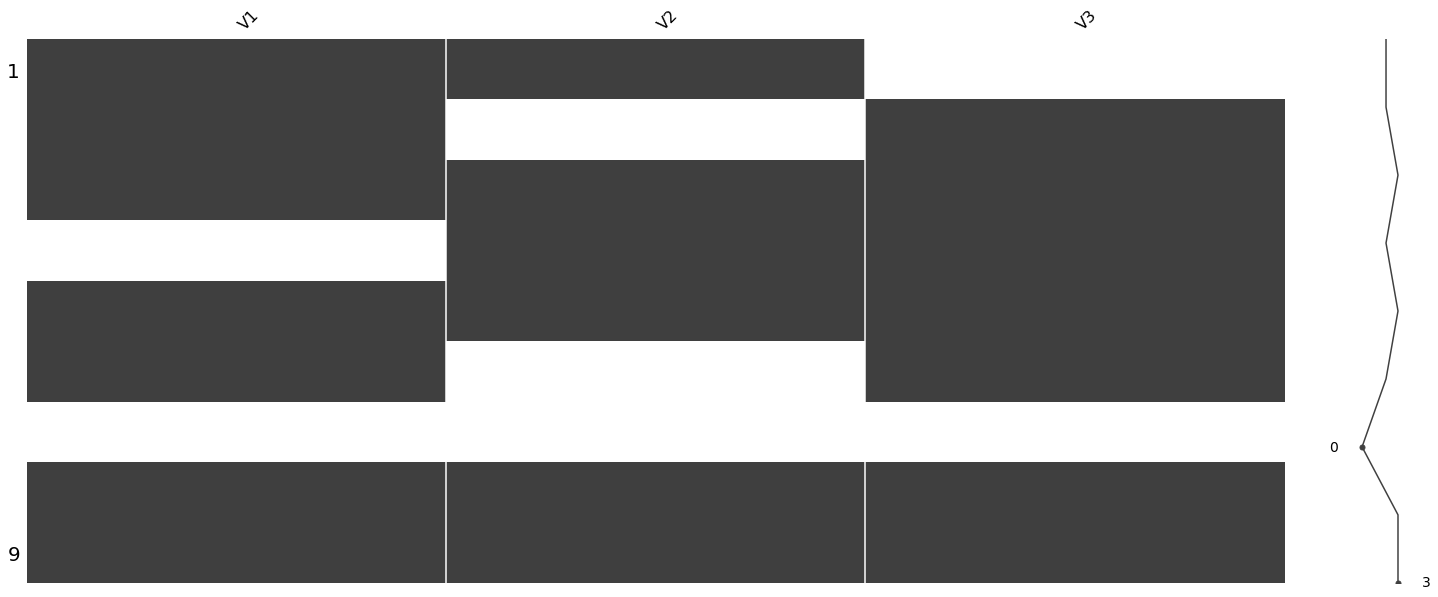

In [25]:
msno.matrix(df);

In [27]:
import seaborn as sns
df = sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [28]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

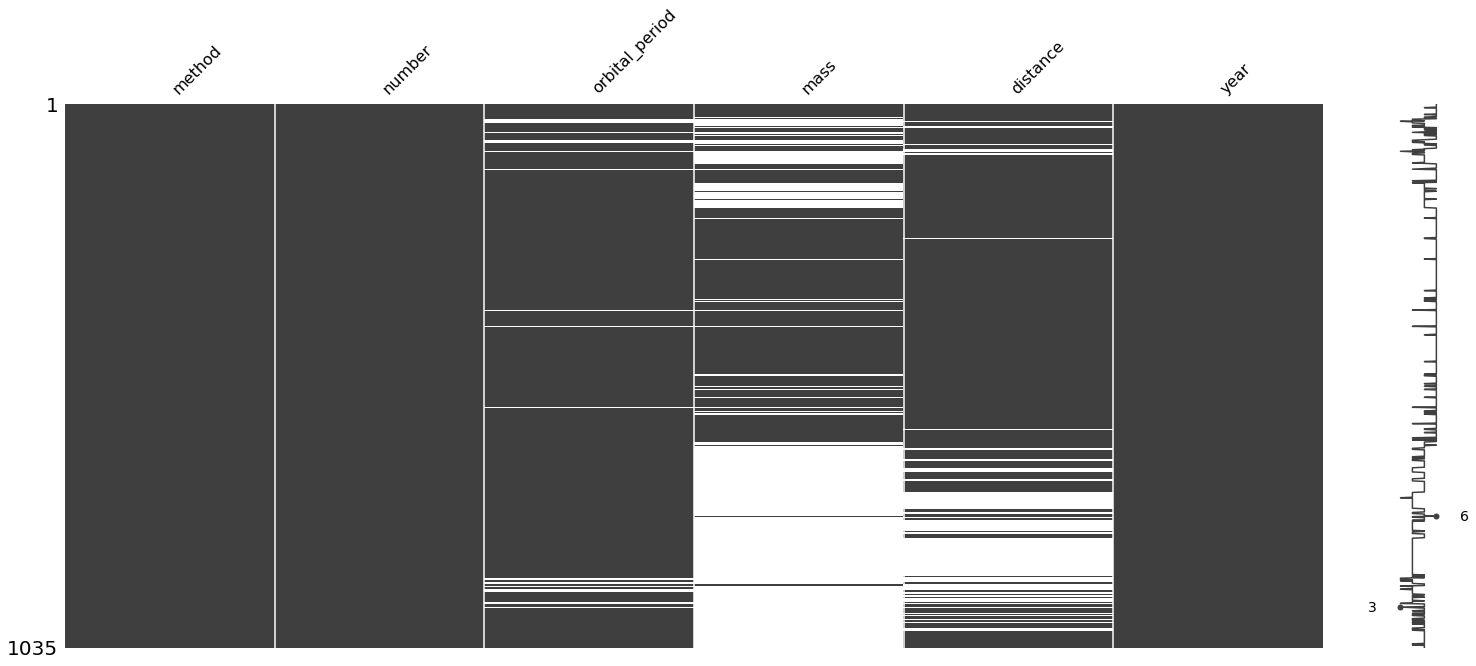

In [29]:
msno.matrix(df);  # mass daki boşlukların bağzıları orbital perioddan kaynaklanmış 

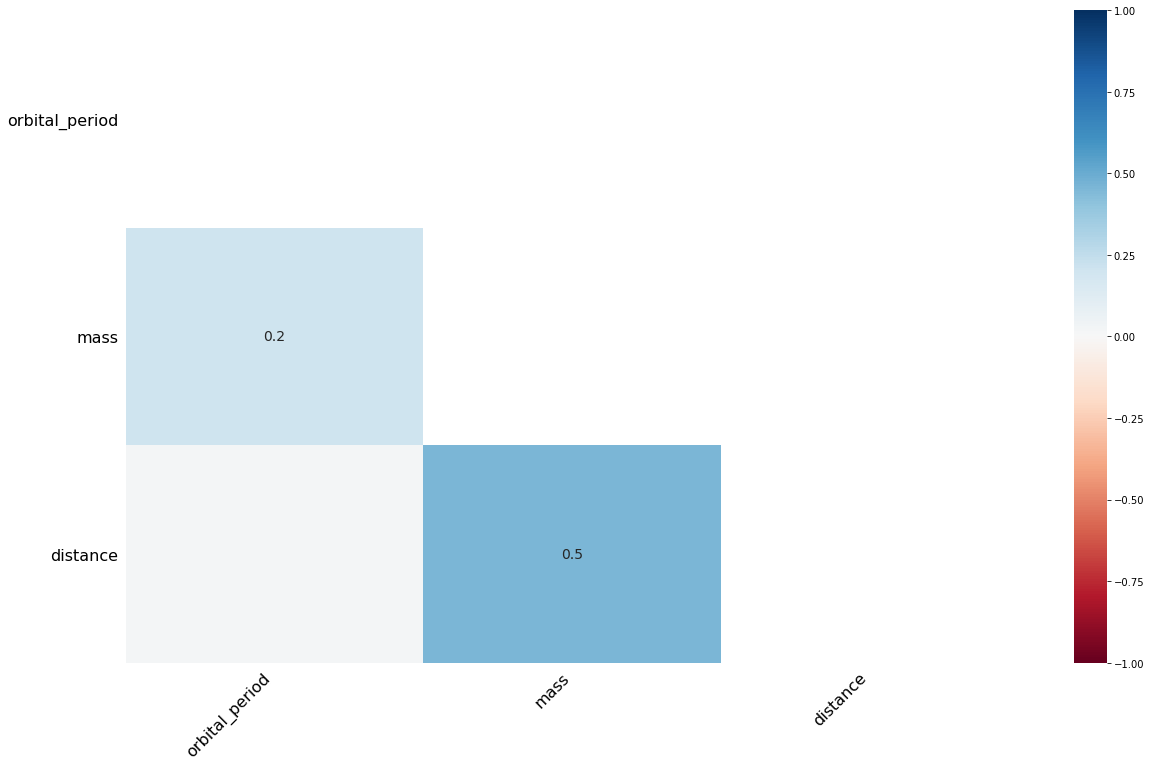

In [30]:
msno.heatmap(df);  # değişkenler arasında görsel analizlere göre rassal olmadığı yorumlarını çıkarıyorum bunun için direk doldurma silme yapılmaması önerilir

## Silme Yöntemleri

In [33]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,17,7,np.NaN,2,31])
df = pd.DataFrame({
    "V1":V1,
    "V2":V2,
    "V3":V3
})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,17.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [34]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,17.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [35]:
df.dropna(how="all") #hepsi aynı anda eksikse

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,17.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [36]:
df.dropna(axis=1) # en az bir tane değişken varsa sil

""
0
1
2
3
4
5
6
7
8


In [37]:
df.dropna(axis=1,how="all") #tüm değerleri na olan değişkenleri silme

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,17.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Değer Atama Yöntemleri

* Sayısal değişkenlerde atama

In [40]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [41]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [43]:
df.apply(lambda x : x.fillna(x.mean()),axis=0)  # tüm değişkenler için 1. yol 

,V1,V2,V3
0,1.0,7.000000,11.428571
1,3.0,6.166667,12.000000
2,6.0,5.000000,5.000000
3,6.0,8.000000,6.000000
4,7.0,12.000000,17.000000
5,1.0,6.166667,7.000000
6,6.0,6.166667,11.428571
7,9.0,2.000000,2.000000
8,15.0,3.000000,31.000000


In [44]:
df.fillna(df.mean()[:])    #tüm değişkenler için ikinci yol

,V1,V2,V3
0,1.0,7.000000,11.428571
1,3.0,6.166667,12.000000
2,6.0,5.000000,5.000000
3,6.0,8.000000,6.000000
4,7.0,12.000000,17.000000
5,1.0,6.166667,7.000000
6,6.0,6.166667,11.428571
7,9.0,2.000000,2.000000
8,15.0,3.000000,31.000000


In [45]:
df.fillna(df.mean()["V1":"V2"])  # v1 ve v2 yi  mean ile v3 ü medyan dolduralım 

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,17.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [47]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    17.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [48]:
# ucuncu yol

df.where(pd.notna(df),df.mean(),axis="columns")

,V1,V2,V3
0,1.0,7.000000,11.428571
1,3.0,6.166667,12.000000
2,6.0,5.000000,5.000000
3,6.0,8.000000,6.000000
4,7.0,12.000000,17.000000
5,1.0,6.166667,7.000000
6,6.0,6.166667,11.428571
7,9.0,2.000000,2.000000
8,15.0,3.000000,31.000000


## Kategorik değişken kırılımında değer atama

In [50]:
# örneğin pazarlama departmanında çalışan birinin eksik maas değeri varsa şirketin maaş ortalamasını atamak yerine pazarlama departmanının maaşını atarız

In [52]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])
df= pd.DataFrame({
    "maas" : V1,
    "V2" : V2,
    "V3" : V3,
    "departman" : V4
})
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [53]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [54]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

## Kategorik değerler için eksik değer atama

In [57]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"],dtype=object)
df= pd.DataFrame({
    "maas" : V1,
    "departman" : V4
})
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [59]:
df["departman"].fillna(df["departman"].mode()[0])  #boşluğu değişkenin modu(en çok tekrar eden değeri(IK)) ile doldurdum sondaki[0] direk IK yazması için yoksa indeşli geliyo

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [60]:
df["departman"].fillna(method="bfill") # eksikliği kendisinden sonra gelen değer ile doldurur

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [61]:
df["departman"].fillna(method="ffill") # eksikliği kendisinden önce gelen değer ile doldurur

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object